# Introduction to Signal Processing

Signal processing is a fundamental area of study within electrical engineering and applied mathematics that focuses on analyzing, modifying, and synthesizing signals. Signals, which convey information about various phenomena, can take many forms, including audio, video, temperature, and more. Signal processing techniques are used to extract valuable information from these signals, improve their quality, and convert them into a form suitable for further analysis or transmission.

## Why is Signal Processing Useful?

Signal processing is essential in a wide range of applications that are integral to modern life. Some of the key areas where signal processing is indispensable include:

1. **Communication Systems**: Signal processing is the backbone of telecommunications, enabling the transmission and reception of data over various media, including fiber optics, wireless channels, and satellite links.
2. **Audio and Speech Processing**: Techniques such as noise reduction, echo cancellation, and speech recognition are rooted in signal processing, improving the clarity and intelligibility of audio signals.
3. **Image and Video Processing**: Signal processing enhances the quality of images and videos, supports compression standards like JPEG and MPEG, and enables computer vision applications.
4. **Medical Imaging**: In medical diagnostics, signal processing techniques are used in MRI, CT scans, and ultrasound imaging to obtain clear and precise images of the human body.
5. **Seismology**: Signal processing helps in analyzing seismic data to predict earthquakes and explore natural resources.

Signal processing transforms raw data into meaningful information, making it an essential tool in science, engineering, and technology.

## Examples

Let's see some examples just to get you motivated. Don't worry about understnding what's happening for now :)

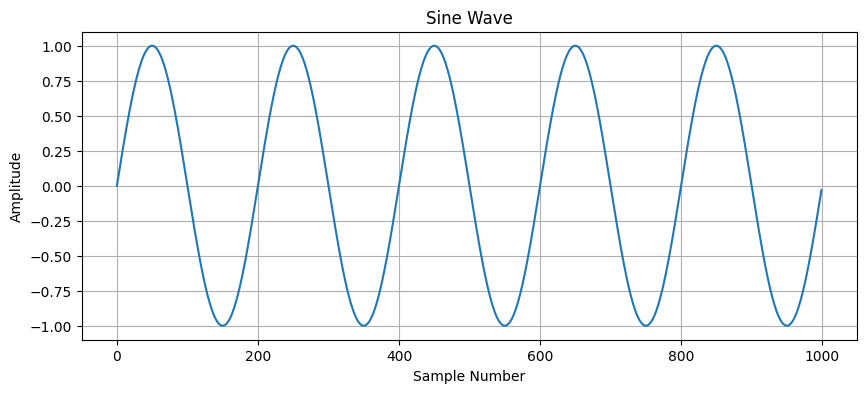

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave
fs = 1000  # Sampling frequency
f = 5  # Frequency of the sine wave
x = np.arange(fs)  # Time vector
y = np.sin(2 * np.pi * f * x / fs)  # Sine wave

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


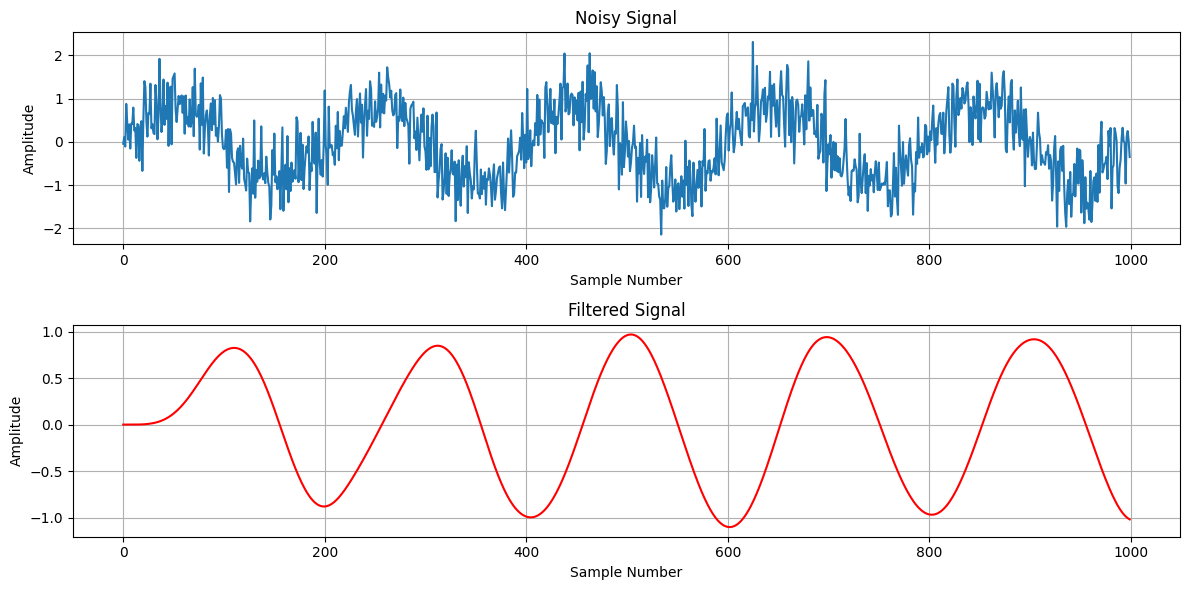

In [2]:
from scipy.signal import butter, lfilter

# Generate a noisy sine wave
noise = np.random.normal(0, 0.5, fs)
noisy_signal = y + noise

# Design a Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

cutoff = 10  # Desired cutoff frequency of the filter, Hz
filtered_signal = lowpass_filter(noisy_signal, cutoff, fs)

# Plot the noisy and filtered signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, noisy_signal, label='Noisy Signal')
plt.title('Noisy Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, filtered_signal, label='Filtered Signal', color='r')
plt.title('Filtered Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


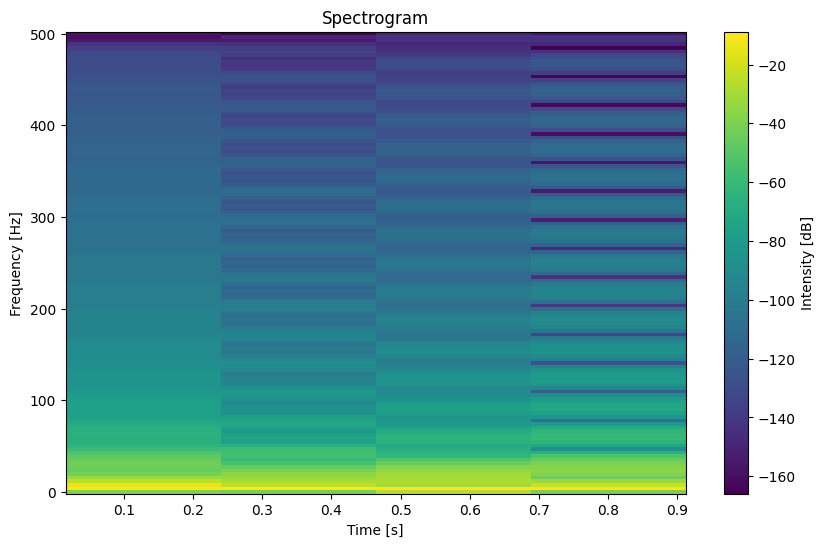

In [3]:
from scipy.signal import spectrogram

# Generate a chirp signal
from scipy.signal import chirp

t = np.linspace(0, 1, fs)
chirp_signal = chirp(t, f0=6, f1=1, t1=1, method='linear')

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(chirp_signal, fs)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
plt.show()
